## 💻 가설 : 2018-2019년 대비, 2020-2022년 교보문고 경제/경영 판매가 많아졌음

❕순서 : 코스피지수와 베스트셀러 분야 상관관계 및 히트맵 -> 년도별/월별 코스피지수 시각화 -> 년도별 교보문고 베스트셀러 분야 시각화

## 1-1) 상관관계 try1(실패작)

- data : 2018~2022년도까지 5개년도간 코스피지수 & 교보문고 베스트셀러 목록

In [1]:
import pandas as pd
import numpy as np

In [2]:
#코스피지수 파일
kospi=pd.read_csv("result_year.csv", encoding='euc-kr')
kospi

,날짜,시가,고가,저가,종가,거래량,상장시가총액
0,2018,2474.86,2607.10,1985.95,2041.04,97105193258,1340000000000000
1,2019,2050.55,2252.05,1891.81,2197.67,116000000000,1480000000000000
2,2020,2201.21,2878.21,1439.43,2873.47,222000000000,1980000000000000
3,2021,2874.50,3316.08,2822.73,2977.65,258000000000,2200000000000000
4,2022,2998.32,3010.77,2134.77,2236.40,146000000000,1770000000000000


In [3]:
#교보문고 파일
#필요한 컬럼만 추출
sales_18 = pd.read_csv('2018years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_19 = pd.read_csv('2019years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_20 = pd.read_csv('2020years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_21 = pd.read_csv('2021years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_22 = pd.read_csv('2022years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]

#년도 컬럼 추가
sales_18[["날짜"]]=2018
sales_19[["날짜"]]=2019
sales_20[["날짜"]]=2020
sales_21[["날짜"]]=2021
sales_22[["날짜"]]=2022

In [4]:
#상관계수를 구하기 위해 18~22년도 교보문고 데이터프레임 병합
book=pd.concat([sales_18, sales_19, sales_20, sales_21, sales_22])

#"날짜"컬럼 기준으로 교보문고 데이터와 코스피지수 데이터 병합
merge=pd.merge(book, kospi)

### 상관계수

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#수치형 변수만 상관관계를 구할 수 있으므로 "분야"컬럼 : 더미변환, "상품명"컬럼 : 삭제
df_cor=pd.get_dummies(data=merge, columns=['분야'])
df_cor.drop(columns="상품명", inplace=True)

<AxesSubplot:>

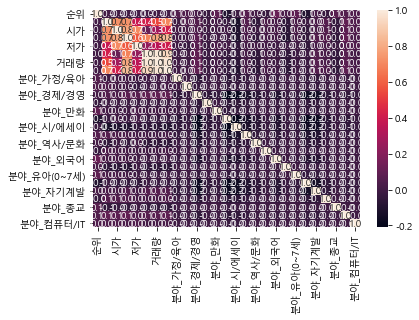

In [6]:
#상관계수, 방법 : 피어슨 상관계수
df_cor=df_cor.corr(method='pearson')

#경고무시
import warnings
warnings.filterwarnings('ignore')
# 한글처리
plt.rc('font', family='Malgun Gothic')
# '-' 문자 처리
plt.rc('axes', unicode_minus=False)

#시각화
sns.heatmap(df_cor, annot=True, fmt='.1f')

-> 의미가 없어보임(다른방법으로 시각화)

## 1-2) try2(성공작)
- data : 2018~2022년도까지 5개년도간 코스피지수 & 교보문고 베스트셀러 목록

In [7]:
#교보문고 파일
#필요한 컬럼만 추출
sales_18 = pd.read_csv('2018years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_19 = pd.read_csv('2019years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_20 = pd.read_csv('2020years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_21 = pd.read_csv('2021years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_22 = pd.read_csv('2022years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]

In [8]:
#2018년의 분야별 value_counts를 데이터프레임으로 만들어서 추가
sales_18=pd.DataFrame(sales_18['분야'].value_counts()).T
sales_19=pd.DataFrame(sales_19['분야'].value_counts()).T
sales_20=pd.DataFrame(sales_20['분야'].value_counts()).T
sales_21=pd.DataFrame(sales_21['분야'].value_counts()).T
sales_22=pd.DataFrame(sales_22['분야'].value_counts()).T

#년도 컬럼 추가
sales_18[["날짜"]]=2018
sales_19[["날짜"]]=2019
sales_20[["날짜"]]=2020
sales_21[["날짜"]]=2021
sales_22[["날짜"]]=2022

In [9]:
#상관계수를 구하기 위해 18~22년도 교보문고 데이터프레임 병합
book=pd.concat([sales_18, sales_19, sales_20, sales_21, sales_22])

#"날짜"컬럼 기준으로 교보문고 데이터와 코스피지수 데이터 병합
merge=pd.merge(book, kospi)
merge

#na값은 0으로 채워줌
merge=merge.fillna(0)

In [10]:
merge

,소설,시/에세이,인문,경제/경영,자기계발,외국어,어린이(초등),역사/문화,과학,가정/육아,...,건강,예술/대중문화,컴퓨터/IT,청소년,시가,고가,저가,종가,거래량,상장시가총액
0,41,39,22,22,18,9,9,8,4,4,...,0.0,0.0,0.0,0.0,2474.86,2607.10,1985.95,2041.04,97105193258,1340000000000000
1,34,37,28,27,16,7,12,6,3,2,...,1.0,1.0,1.0,0.0,2050.55,2252.05,1891.81,2197.67,116000000000,1480000000000000
2,32,30,28,32,26,9,13,2,4,3,...,2.0,1.0,0.0,3.0,2201.21,2878.21,1439.43,2873.47,222000000000,1980000000000000
3,34,23,19,45,27,8,14,4,2,3,...,0.0,1.0,2.0,5.0,2874.50,3316.08,2822.73,2977.65,258000000000,2200000000000000
4,37,18,25,29,22,12,19,4,4,3,...,3.0,2.0,2.0,5.0,2998.32,3010.77,2134.77,2236.40,146000000000,1770000000000000


<AxesSubplot:>

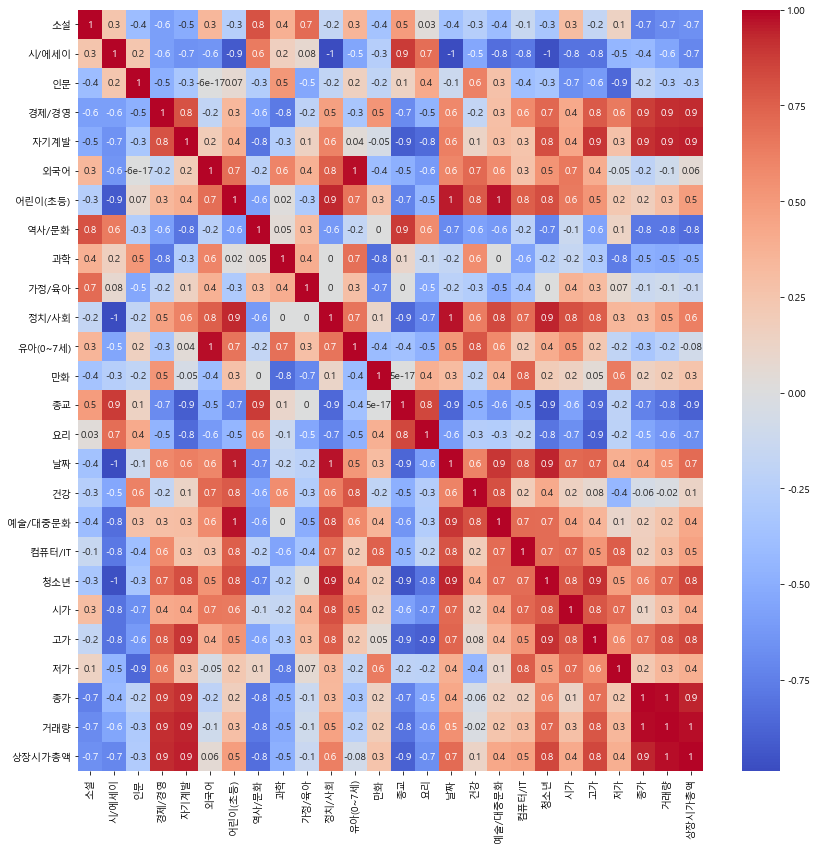

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#모두 수치형 변수이므로 그대로 상관계수행렬 구해줌
df_cor=merge.corr(method='pearson')
plt.figure(figsize=(14,14))
sns.heatmap(df_cor, annot=True, fmt='.1g', cmap='coolwarm')

<상관관계 분석 결과>
- 책 분야중 "경제/경영", "자기계발", "청소년"이 "고가", "종가", "거래량", "상장시가총액"과 특히 강한 양의 상관관계를 보임.

## 2-1) 연도별 코스피지수 시각화

In [12]:
#년도별 데이터 read
kospi=pd.read_csv("result_year.csv", encoding='euc-kr')

#시각화를 위해 "날짜"컬럼 데이터타입 문자열로 변환
kospi['날짜']=kospi['날짜'].astype('str')

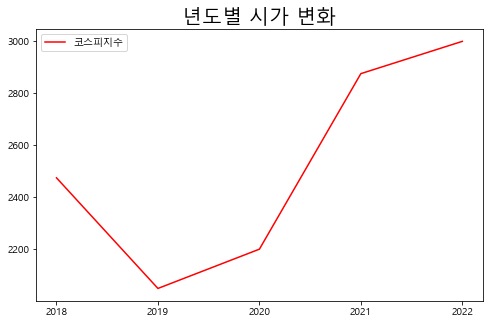

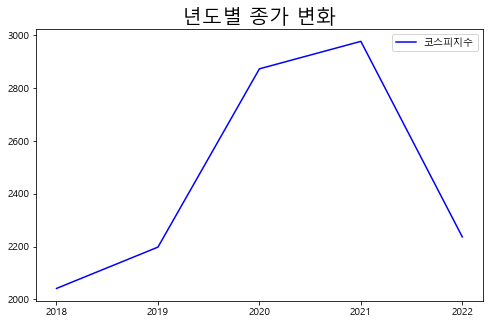

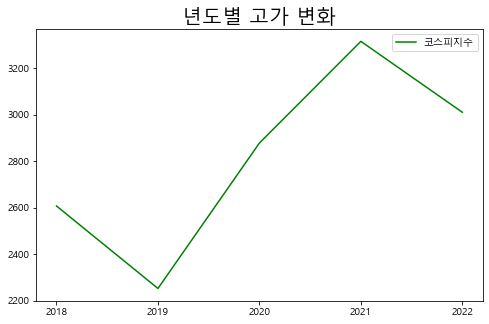

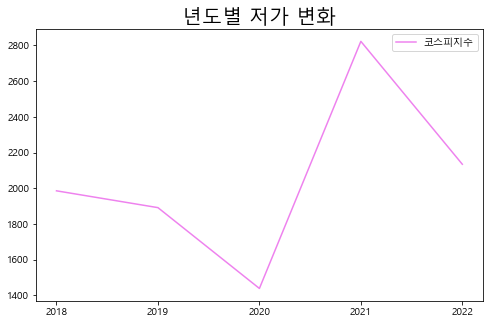

In [13]:
plt.figure(figsize=(8,5))
plt.title('년도별 시가 변화', fontsize=20)
plt.plot(kospi['날짜'], kospi['시가'], label='코스피지수', color='red')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.title('년도별 종가 변화', fontsize=20)
plt.plot(kospi['날짜'], kospi['종가'], label='코스피지수', color='blue')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.title('년도별 고가 변화', fontsize=20)
plt.plot(kospi['날짜'], kospi['고가'], label='코스피지수', color='green')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.title('년도별 저가 변화', fontsize=20)
plt.plot(kospi['날짜'], kospi['저가'], label='코스피지수', color='violet')
plt.legend()
plt.show()

-> 코스피지수는 주로 종가로 시각화한다고 하는데 우선 각각 만들어봤습니다!

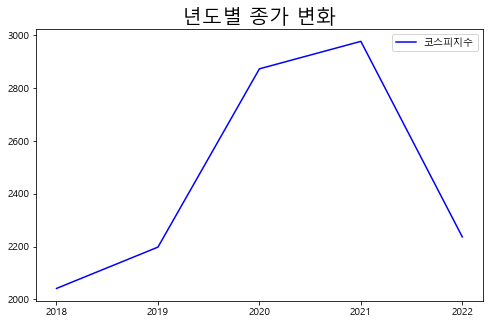

In [14]:
plt.figure(figsize=(8,5))
plt.title('년도별 종가 변화', fontsize=20)
plt.plot(kospi['날짜'], kospi['종가'], label='코스피지수', color='blue')
plt.legend()
plt.show()

종가로만 시각화 해봤을 때, 코로나 이후로 개인투자자가 확대되면서 특징적으로 주식시장이 활성화되었기 때문에 2020년, 2021년에 증가한 것으로 확인

## 2-2) 월별 코스피지수 시각화

In [15]:
kospi=pd.read_csv("result_month.csv", encoding='euc-kr')

In [16]:
import datetime
kospi['날짜']=pd.to_datetime(kospi['날짜'])

#날짜에서 년도와 월을 분리
kospi['year'] = kospi['날짜'].dt.strftime("%Y")
kospi['month'] = kospi['날짜'].dt.strftime("%m")

In [17]:
#시각화에 필요한 컬럼만 남김
kospi=kospi[['종가', 'year', 'month']]

In [18]:
kospi_18=kospi[kospi['year']=='2018']
kospi_19=kospi[kospi['year']=='2019']
kospi_20=kospi[kospi['year']=='2020']
kospi_21=kospi[kospi['year']=='2021']
kospi_22=kospi[kospi['year']=='2022']

In [19]:
kospi_18

,종가,year,month
0,2566.46,2018,01
1,2427.36,2018,02
2,2445.85,2018,03
3,2515.38,2018,04
4,2423.01,2018,05
5,2326.13,2018,06
6,2295.26,2018,07
7,2322.88,2018,08
8,2343.07,2018,09
9,2029.69,2018,10


In [20]:
month=kospi_18['month']

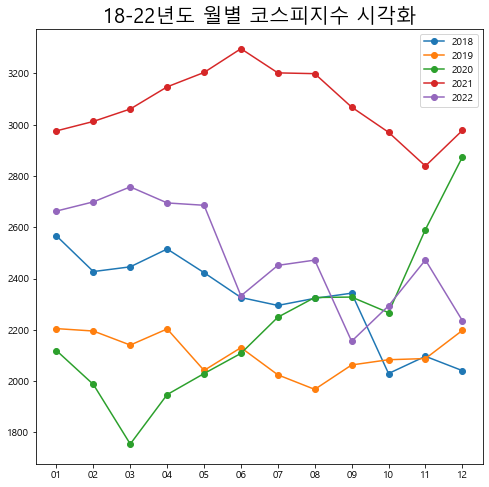

In [21]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(month,kospi_18['종가'],marker='o',label='2018') ## 선그래프 생성
ax.plot(month,kospi_19['종가'],marker='o',label='2019') 
ax.plot(month,kospi_20['종가'],marker='o',label='2020') ## 선그래프 생성
ax.plot(month,kospi_21['종가'],marker='o',label='2021') 
ax.plot(month,kospi_22['종가'],marker='o',label='2022') 

ax.legend() ## 범례
 
plt.title('18-22년도 월별 코스피지수 시각화',fontsize=20) ## 타이틀 설정
plt.show()

-> 18~22년도 전체를 시각화 할때보다 19, 20,21년도만 따로 시각화했을 때 코로나 시국의 코스피지수 변화가 더 잘보임

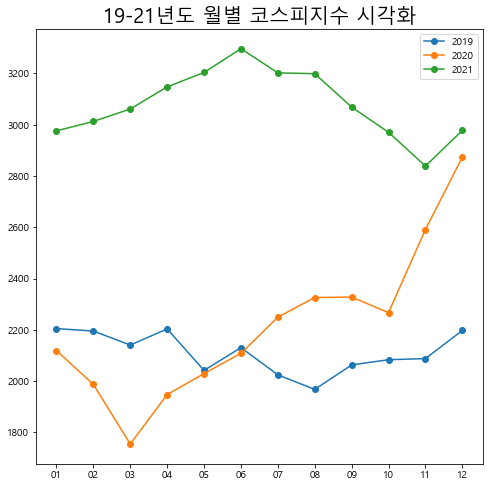

In [22]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(month,kospi_19['종가'],marker='o',label='2019') 
ax.plot(month,kospi_20['종가'],marker='o',label='2020') ## 선그래프 생성
ax.plot(month,kospi_21['종가'],marker='o',label='2021') 

ax.legend() ## 범례
 
plt.title('19-21년도 월별 코스피지수 시각화',fontsize=20) ## 타이틀 설정
plt.show()

2019->2020년도로 넘어가는 3월에 잠깐 주춤하지만 2021년까지 큰 상승세를 보이고있음

## 3-1) 연도별 베스트셀러(분야) 시각화

In [23]:
# 베스트셀러 순위 비율 파악
sales_18 = pd.read_csv('2018years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_19 = pd.read_csv('2019years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_20 = pd.read_csv('2020years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_21 = pd.read_csv('2021years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]
sales_22 = pd.read_csv('2022years.csv',encoding='euc-kr')[['순위', '상품명', '분야']]

#분야별로 몇개가 있는지 count해서 비율로 계산해주었음
#그래프 가독성을 위해 top5만 표시, 비율 순서로 정렬
sales_18=round(pd.DataFrame(sales_18['분야'].value_counts())/len(sales_18)*100,2).head(5).sort_values("분야")
sales_19=round(pd.DataFrame(sales_19['분야'].value_counts())/len(sales_19)*100,2).head(5).sort_values("분야")
sales_20=round(pd.DataFrame(sales_20['분야'].value_counts())/len(sales_20)*100,2).head(5).sort_values("분야")
sales_21=round(pd.DataFrame(sales_21['분야'].value_counts())/len(sales_21)*100,2).head(5).sort_values("분야")
sales_22=round(pd.DataFrame(sales_22['분야'].value_counts())/len(sales_22)*100,2).head(5).sort_values("분야")

#컬럼명 분야->%로 컬럼명 변경
sales_18.rename(columns={"분야":"%"}, inplace=True)
sales_19.rename(columns={"분야":"%"}, inplace=True)
sales_20.rename(columns={"분야":"%"}, inplace=True)
sales_21.rename(columns={"분야":"%"}, inplace=True)
sales_22.rename(columns={"분야":"%"}, inplace=True)

#시각화를 위한 년도 컬럼 추가
sales_18[["날짜"]]=2018
sales_19[["날짜"]]=2019
sales_20[["날짜"]]=2020
sales_21[["날짜"]]=2021
sales_22[["날짜"]]=2022

In [24]:
# 18~22년 데이터 병합
book=pd.concat([sales_18, sales_19, sales_20, sales_21, sales_22])
book=book.reset_index()

<AxesSubplot:title={'center':'년도별 교보문고 베스트셀러 분야의 변화'}, xlabel='날짜', ylabel='%'>

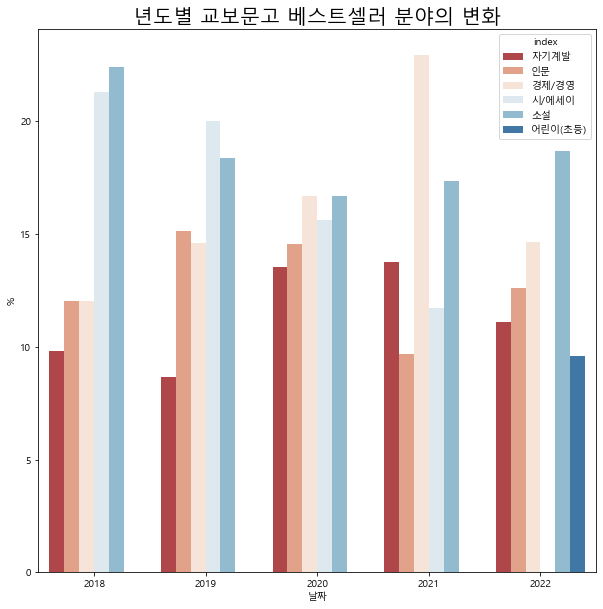

In [25]:
plt.figure(figsize=(10,10))
plt.title('년도별 교보문고 베스트셀러 분야의 변화', fontsize=20)

sns.barplot(x='날짜', y='%', hue='index', data=book, palette='RdBu')
# palette 스타일 보기 편하신대로 지정해주시면 됩니다!
# ex) palette='Set3', palette='RdGy', palette='PuOr' 등등..
# 색상 링크 넣어둘께요 https://hleecaster.com/python-seaborn-color/

-> 2018,2019년 대비 2020,2021년 "경제/경영" 분야가 차지하는 비율이 높아지는 것을 확인

## 3-2) 경제/경영 분야만 시각화

In [26]:
년도별=book[book['index']=='경제/경영']
년도별

,index,%,날짜
2,경제/경영,12.02,2018
6,경제/경영,14.59,2019
13,경제/경영,16.67,2020
19,경제/경영,22.96,2021
23,경제/경영,14.65,2022


<AxesSubplot:xlabel='날짜', ylabel='%'>

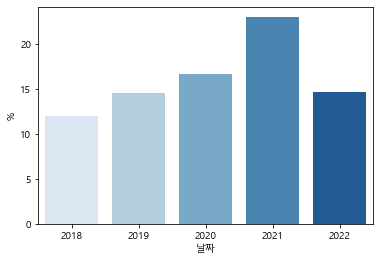

In [27]:
sns.barplot(x='날짜', y='%', data=년도별, palette='Blues')

-> 코로나로 시장이 침체되었을 2021, 2021년에 "경제/경영"이 베스트셀러에서 차지하는 비율이 높아진 것을 확인